# Lab 6.1: Simple Linear Regression

In [1]:
%pylab inline

import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import yaml

from sqlalchemy import create_engine

pg_creds = yaml.load(open('../../pg_creds.yaml'))['student']

engine = create_engine('postgresql://{user}:{password}@{host}:{port}/{dbname}'.format(**pg_creds))

Populating the interactive namespace from numpy and matplotlib


**Question 1**  

The scatterplots below show the relationship between height, diameter, and volume of timber in 31 felled black cherry trees. The diameter of the tree is measured 4.5 feet above the ground.  

<img src="images/lab6_1_q4.png" width="600">  

(a) Describe the relationship between volume and height of these trees.  

As height increases, volume increases, but scatter.

(b) Describe the relationship between volume and diameter of these trees.  

More clear linear relationship. As diameter increase, volume increases.

(c) Suppose you have height and diameter measurements for another black cherry tree. Which of these variables would be preferable to use to predict the volume of timber in this tree using a simple linear regression model? Explain your reasoning.

I prefer diameter to predict volume because the relationship is much more linear compared to using height as predictor.

**Question 2**  

The Coast Starlight Amtrak train runs from Seattle to Los Angeles.  

The mean travel time from one stop to the next on the Coast Starlight is 129 mins, with a standard deviation of 113 minutes. The mean distance traveled from one stop to the next is 108 miles with a standard deviation of 99 miles. The correlation between travel time and distance is 0.636.  

(a) Write the equation of the regression line for predicting travel time.  

$x = distance$

$y = time$

$b_1 = r_{xy} \frac{s_y}{s_x}$

In [2]:
b_1 = 0.636 * (113/99)
b_1

0.725939393939394

$b_0 = \bar{y} - b_1 \bar{x}$

In [3]:
b_0 = 129 - b_1 * 108
b_0

50.598545454545444

$Time = 50.5985 + Distance * 0.7259$

(b) Interpret the slope and the intercept in this context.  

Slope: every unit of increase in distance affects the time by 0.7259.

Intercept: when distance travelled is 0, then time is 50.60 minutes, which doesn't make sense, unless interpreted as a "permanent" delay of travel time of such amount.

(c) Calculate $R^2$ of the regression line for predicting travel time from distance traveled for the Coast Starlight, and interpret $R^2$ in the context of the application.  

In [4]:
correlation_distance_time = 0.636
r_square = correlation_distance_time**2
r_square

0.404496

The percentage of the variation in y (time) can be explained by the corresponding variation in X (distance) and the least-squares line is 40.45%, and the unexplained percentage of variation is 100% – 40.45% = 59.55%.

(d) The distance between Santa Barbara and Los Angeles is 103 miles. Use the model to estimate the time it takes for the Starlight to travel between these two cities.  

In [5]:
print("It takes", b_0 + b_1 * 103, "minutes.")

It takes 125.37030303030302 minutes.


(e) It actually takes the Coast Starlight about 168 mins to travel from Santa Barbara to Los Angeles. Calculate the residual and explain the meaning of this residual value.  

In [6]:
time_observed = 168
time_expected = b_0 + b_1 * 103
residual = time_observed - time_expected
residual

42.62969696969698

It takes 42.63 more minutes to get to LA from Santa Barbara than anticipated by Amtrak.

(f) Suppose Amtrak is considering adding a stop to the Coast Starlight 500 miles away from Los Angeles. Would it be appropriate to use this linear model to predict the travel time from Los Angeles to this point?  

No, we would need to build a new model since the means and standard deviations for distance and time will be impacted/changed by adding a new stop.

**Question 3**

You are given data about students' test results and the number of hours they study below:

```
Test results:    30, 45, 85, 100
Hours of study:  5,  7 , 10, 70
```

1) We will use the following model to predict the test results based on the number of hours a student studies:
   
   $\text{test result} = \beta_0 + \beta_1 \text{number of hours} ＋ \varepsilon$
   
   Explain what $\beta_0$ represents in the model. 
   

   

The true intercept of the model: the test result without studying.

2) Using the oridinary least square approach, find $b_0$ ($\hat{\beta}_0$) and $b_1$($\hat{\beta}_1$) for the proposed model that best fits the data. 


   

In [7]:
hours_study = [5,7,10,70]
test_results = [30,45,85,100]

In [8]:
hours_study_df = pd.DataFrame(columns=['hours_study','test_results'])
hours_study_df['hours_study'] = hours_study
hours_study_df['test_results'] = test_results
hours_study_df

,hours_study,test_results
0,5,30
1,7,45
2,10,85
3,70,100


In [9]:
hours_study_mean = hours_study_df['hours_study'].mean()
hours_study_mean

23.0

In [10]:
hours_study_std = hours_study_df['hours_study'].std()
hours_study_std

31.400636936215164

In [11]:
test_results_mean = hours_study_df['test_results'].mean()
test_results_mean

65.0

In [12]:
test_results_std = hours_study_df['test_results'].std()
test_results_std

32.914029430219166

$b_1 = r_{xy} \frac{s_y}{s_x}$

$b_0 = \bar{y} - b_1 \bar{x}$

In [13]:
r_xy = corrcoef(hours_study_df['hours_study'],hours_study_df['test_results'])
r_xy

array([[ 1.        ,  0.75308868],
       [ 0.75308868,  1.        ]])

In [14]:
b_1 = r_xy[0][1] * (test_results_std/hours_study_std)
b_1

0.78938471940500321

In [15]:
b_0 = test_results_mean - b_1 * hours_study_mean
b_0

46.84415145368493

$Test Results = 46.84 + Hours Study * 0.7894$

3) What criteria are used to estimate $\beta_0$ and $\beta_1$ in part 2? Compute the SSE (residual sum of squares) of the model.    

   

* Linearity: there is a linear relationship between hours of study and test results.  

* Normality: the residuals are nearly Normal.  

* Constant variance: the residuals have constant variance.  

* Independent observations: the observations are independent of each other.

In [16]:
# Function to calculate residuals:
def residuals(x,y):
    expected_list = []
    residuals = 0
    for i in range(len(x)):
        expected = b_0 + b_1 * i
        expected_list.append(expected)
    for j, s in zip(y,expected_list):
        residuals += (j - s)**2
    return residuals

In [17]:
residuals(hours_study,test_results)

4207.9335682653837

4) Compute the SST (total sum of squares) and SSR (regression sum of squaress). Express and compute the $R^2$ of the model in terms of SST, SSR and/or SSE. Explain what $R^2$ represents.  
   
   

In [18]:
# Function to calculate SSR:
def ssr(x,y):
    expected_list = []
    ssr = 0
    y_mean = sum(y)/len(y)
    for i in range(len(x)):
        expected = b_0 + b_1 * i
        expected_list.append(expected)
    for j in range(len(expected_list)):
        ssr += (j - y_mean)**2
    return ssr

In [19]:
ssr(hours_study,test_results)

16134.0

In [20]:
sst = ssr(hours_study,test_results) + residuals(hours_study,test_results)
sst

20341.933568265384

In [21]:
r_squared = ssr(hours_study,test_results)/sst
r_squared

0.79313994148373346

The percentage of the variation in y (test results) can be explained by the corresponding variation in X (hours of study) and the least-squares line is 79.31%, and the unexplained percentage of variation is 100% – 79.31% = 20.69%.

5) Plot the number of hours of study (x) against test result (y) on a scatter plot. Plot the OLS regression line on top of the data.

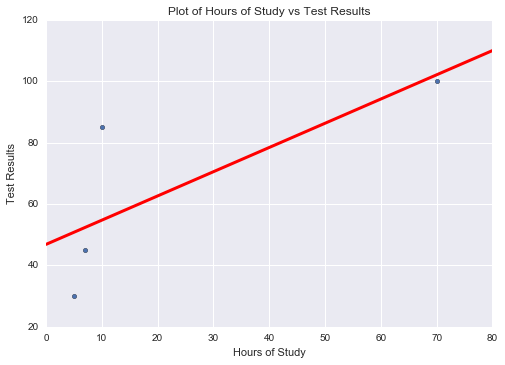

In [22]:
ax = hours_study_df.plot('hours_study', 'test_results', kind='scatter')
xx = np.linspace(0, 80, 100)
ax.plot(xx, xx * b_1 + b_0, color='red', lw=3)
ax.set_xlim([0,80])
xlabel("Hours of Study")
ylabel("Test Results")
title("Plot of Hours of Study vs Test Results");

**Question 4**  

In the table `utils` (in RDS) are the average utility bills for homes of a particular size (Y) and the average monthly temperature (X).  

(a) Make a scatter plot of the data.  

In [23]:
utils = pd.read_sql("SELECT * FROM utils;", engine)

In [24]:
utils

,month,bill,temp
0,Jan,148.5,38
1,Feb,136.5,45
2,Mar,117.0,49
3,Apr,91.5,57
4,May,82.5,69
5,Jun,94.5,78
6,Jul,120.0,84
7,Aug,142.5,89
8,Sep,97.5,79
9,Oct,84.0,64


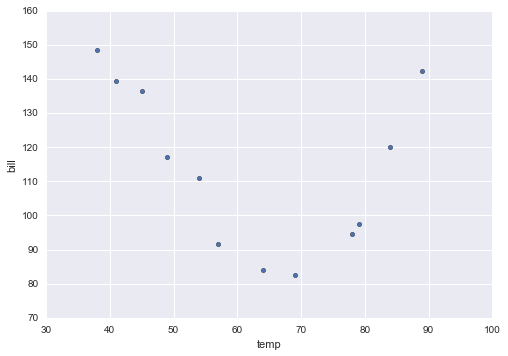

In [25]:
utils.plot('temp', 'bill', kind='scatter');

Since it's not possible to fit a line in the above plot, it makes sense to create two distinct dataframes, since we can see two different lines fitting each half of the plot. We choose 69 as the temperature "threshold" since it's when the bill is minimum.

In [26]:
utils_winter = utils[utils['temp'] < 69]

In [27]:
utils_summer = utils[utils['temp'] >= 69]

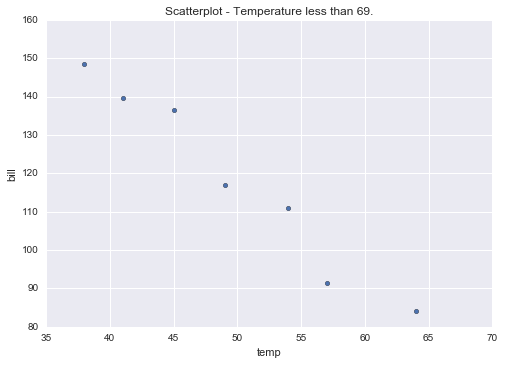

In [28]:
utils_winter.plot('temp', 'bill', kind='scatter')
title('Scatterplot - Temperature less than 69.');

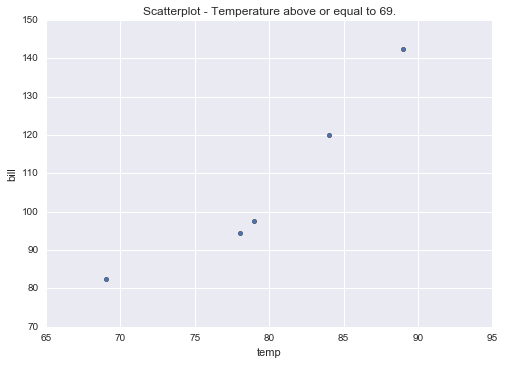

In [29]:
utils_summer.plot('temp', 'bill', kind='scatter')
title('Scatterplot - Temperature above or equal to 69.');

(b) Does it appear from inspection that there is a relationship between the variables? Why or why not?  

Yes, BUT once we "split" the original dataframe into two dataframes, been the "split" point 69 degrees which equals to the minimum bill amount.

(c) Calculate the least squares line.  

Below is for the whole dataframe.

In [30]:
X = utils.temp
X = sm.add_constant(X)
y = utils.bill

model = sm.OLS(y, X)
results = model.fit()
results.summary()

//anaconda/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   bill   R-squared:                       0.124
Model:                            OLS   Adj. R-squared:                  0.036
Method:                 Least Squares   F-statistic:                     1.416
Date:                Mon, 03 Oct 2016   Prob (F-statistic):              0.261
Time:                        15:57:44   Log-Likelihood:                -53.778
No. Observations:                  12   AIC:                             111.6
Df Residuals:                      10   BIC:                             112.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        143.6228     25.995      5.525      0.000        85.701   201.544
temp          -0.4799      0.403     -1.190      0.261        -1.378     0.419
==============================================================================
Omnibus:                        0.570   Durbin-Watson:                   1.176
Prob(Omnibus):                  0.752   Jarque-Bera (JB):                0.588
Skew:                           0.272   Prob(JB):                        0.745
Kurtosis:                       2.062   Cond. No.                         248.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Below is for the winter dataframe:

In [31]:
X_winter = utils_winter.temp
X_winter = sm.add_constant(X_winter)
y_winter = utils_winter.bill

model_winter = sm.OLS(y_winter, X_winter)
results_winter = model_winter.fit()
results_winter.summary()

//anaconda/lib/python3.5/site-packages/statsmodels/stats/stattools.py:72: UserWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  "samples were given." % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   bill   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     133.1
Date:                Mon, 03 Oct 2016   Prob (F-statistic):           8.58e-05
Time:                        15:57:44   Log-Likelihood:                -20.208
No. Observations:                   7   AIC:                             44.42
Df Residuals:                       5   BIC:                             44.31
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        248.5358     11.454     21.698      0.000       219.091   277.980
temp          -2.6200      0.227    -11.538      0.000        -3.204    -2.036
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.209
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.393
Skew:                          -0.346   Prob(JB):                        0.822
Kurtosis:                       2.069   Cond. No.                         298.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Below is for the summer dataframe:

In [32]:
X_summer = utils_summer.temp
X_summer = sm.add_constant(X_summer)
y_summer = utils_summer.bill

model_summer = sm.OLS(y_summer, X_summer)
results_summer = model_summer.fit()
results_summer.summary()

//anaconda/lib/python3.5/site-packages/statsmodels/stats/stattools.py:72: UserWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  "samples were given." % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   bill   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                     27.37
Date:                Mon, 03 Oct 2016   Prob (F-statistic):             0.0136
Time:                        15:57:44   Log-Likelihood:                -16.609
No. Observations:                   5   AIC:                             37.22
Df Residuals:                       3   BIC:                             36.44
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       -134.6863     46.435     -2.901      0.062      -282.463    13.091
temp           3.0337      0.580      5.232      0.014         1.188     4.879
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.475
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.635
Skew:                           0.019   Prob(JB):                        0.728
Kurtosis:                       1.255   Cond. No.                         961.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

(d) Calculate and interpret the value of $R^2$.  

For winter:

The percentage of the variation in y (bill) can be explained by the corresponding variation in X (temperature) and the least-squares line is 96.4%, and the unexplained percentage of variation is 100% – 96.4% = 3.6%.

For summer:

The percentage of the variation in y (bill) can be explained by the corresponding variation in X (temperature) and the least-squares line is 90.1%, and the unexplained percentage of variation is 100% – 90.1% = 9.9%.

(e) Interpret the intercept and slope coefficients.  

In [33]:
results_winter.params

const    248.535754
temp      -2.619972
dtype: float64

As temperature warms up (temperature goes up), the electricity bill goes down. Every unit of increase in temperature affects the bill by -2.62. During the winter, when is cold, we consume more electricity to stay warm.

In [34]:
results_summer.params

const   -134.686266
temp       3.033662
dtype: float64

As temperature warms up (temperature goes up), the electricity bill goes up. Every unit of increase in temperature affects the bill by 3.0337. During the summer, when it's hot, we use more electricity for air conditioning.

(f) What is the 95% confidence interval for the slope?  

For the winter dataframe:

the 95 % confidence interval is: (-3.204, -2.036)

For the summer dataframe:

the 95 % confidence interval is: (1.188, 4.879)

(g) Is the average monthly temperature a significant predictor of the average utility bill? Why or why not?  

Yes, BUT as we stated above, we need to differenciate between summer months and winter months, meaning, splitting the original dataframe into two, where the temperature equals to the minimum bill amount.

(e) Use the least squares line to estimate the average utility bill if the average monthly temperature is 120 degrees. Do you think that your answer is reasonable? Why or why not? 

In [35]:
# 120 degress is in the range of above 65 degrees.
results_summer.params[1] * 120 + results_summer.params[0]

229.35323159784554

About $229.35 bill. It seems reasonable as we would be using air conditioning all day.